---
layout: default
title: "Deep Learning - Speed up learning - Tuning"
categories: deeplearning
permalink: /ML31/
order: 31
comments: true
---

In [4]:
%pylab --no-import-all inline
from plot_ann import ann
from scipy.stats import multivariate_normal

Populating the interactive namespace from numpy and matplotlib


# Hyperparameter tuning

## Tuning process
How to organize your hyperparameters tuning process. In deep-learning you come across many hyper-parameters: We have seen:

* the learning rate $\alpha$ (if you are using a constant learning rate)
* the momentum parameter $\beta$
* the parameters $\beta_1, \beta_2, \epsilon$ if using ADAM optimization
* the number of hidden layers
* the number of hidden units in each layer
* the number of epochs
* the learning rate decay system and its parameter and possibly its parameter $k$
* the mini-batch size $t$

In many cases, if sorted by their importance the list would be: 

1. The single most important hyperparameter in almost all situations is the learning rate $\alpha$. 
2. Second in importance come
    * the momentum parameter $\beta$, for which $0.9$ is found to be be a good default parameter. 
    * the the mini-batch size
    * the number of hidden units in layers
3. Third in importance come 
    * the number of layers (that can sometime make a huge difference)
    * the learning rate decay
4. When using an ADAM optimization algorithm usually its parameters are never tuned and the default are kept ($0.9, 0.999, 10^{-8}$)

However it is very difficult to give a general rule for the importance of hyperparameters and each model tend to behave differently.

### Approaches to hyperparameter tuning
When approaching hyperparameter tuning there two choices, which are based on the amount of computational power available and the complexity (in terms of size of the network and training data) of the model: 

* If computational resources are scarce relatively to the complexity of the model, then one tends to babysit one model. A single model is trained and its hyperparameters are tuned day by day based on the progress of the training (<a href="#fig:tuneapproach"> figure below</a>, panel A).

* If computational resources are abundant, it is always better to train many models in parallel, each with a different set of hyperparameters (<a href="#fig:tuneapproach"> figure below</a>, panel B).

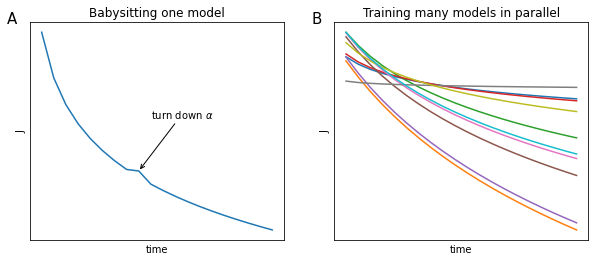

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ax1, ax2 = axes
x = np.linspace(0.1, 2, 20)
y=-np.log(x)
y[8] = .2
ax1.plot(x, y)
ax1.annotate('turn down $\\alpha$', (x[8], .2), (1, 1), arrowprops=dict(arrowstyle='->'))
ax1.set_title('Babysitting one model')

for noise in np.random.rand(10):
    ax2.plot(x, -np.log(x+noise)*noise)

ax2.set_title('Training many models in parallel')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_ylabel('J')
    ax.set_xlabel('time')

<i id="fig:tuneapproach">Approaches to hyperparameter tuning</i>

### Hyperparameter exploration
In early days of machine learning, practitioners would sample the space of hyperparameters systematically, by testing combinations of intervals of hyperparameters (<a href="#fig:hypertune">figure below</a>, panel A). Usually, when tuning deep-learning hyperparameters, their space is sampled randomly (<a href="#fig:hypertune">figure below</a>, panel B), since it is almost impossible to know in advance which hyperparameter will have more impact on the model, but at the same time some hyperparameters tend to be much more important than others

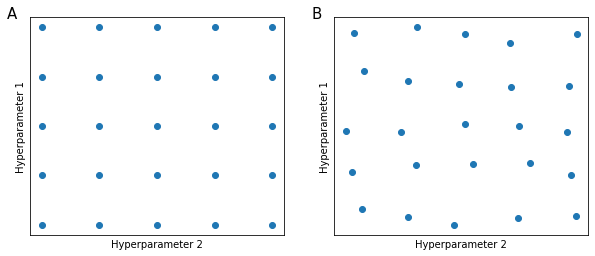

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 1, 5)
x, y = np.meshgrid(x, x)
noise = (np.random.rand(5, 5)-.5)*.1
axes[0].plot(x, y, ls='none', marker='o', c='C0')
axes[1].plot(x+noise, y+noise, ls='none', marker='o', c='C0')

for ax, l in zip(axes, 'AB'):
    ax.text(-0.05, 1.05, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_xlabel('Hyperparameter 2')
    ax.set_ylabel('Hyperparameter 1')

<i id="fig:hypertune">Hyperparameter space sampling in early days of machine learning (A) and in modern days of deep-learning (B)</i>

This is done because when sampling the hyperparameter space as in <a href="#fig:hypertune">figure above</a> panel A, for each column of hyperparameters, you will test 5 values of Hyperparameter 1 but only 1 value of Hyperparameter 2, whereas each point <a href="#fig:hypertune">figure above</a> panel B, is a different set of Hyperparameters 1 and 2.

### Scale of hyperparameters
Choosing hyperparameters at random doesn't mean that they all need to be randomly picked from a uniform distribution, each parameter should have the appropriate scale (<a href="#fig:scales">figure below</a>). The number of hidden layers $n^{[l]}$ can be sampled from a uniform random distribution between 50 and 100, but for the number of hidden layers $L$ it is more sensible to maybe explore all the values between 2 and 4. For the learning rate $\alpha$ a uniform random sampling would waste many computational resources since we want to sample a much bigger range [0.0001, 1], and a logarithmic random sampling would be more appropriate.

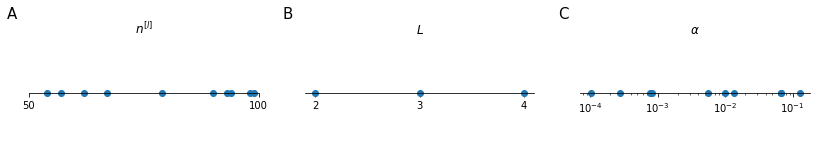

In [84]:
fig, axes = plt.subplots(1, 3, figsize=(14, 2))
ax1, ax2, ax3 = axes

lims = [50, 100]
x = np.random.randint(*lims, size=10)
ax1.set_xticks(lims)
ax1.set_xlim(lims)
ax1.plot(x, np.zeros_like(x), ls='none', marker='o')
ax1.set_title('$n^{[l]}$')

x = np.linspace(2, 4, 3)
ax2.set_xticks(x)
ax2.plot(x, np.zeros_like(x), ls='none', marker='o')
ax2.set_title('$L$')

lims = [0.0001, 1]
x = 10**(-4*np.random.rand(10))
ax3.plot(x, np.zeros_like(x), ls='none', marker='o')
ax3.set_xscale('log')
ax3.set_title('$\\alpha$')

for ax, l in zip(axes, 'ABC'):
    ax.text(-0.05, 1.3, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('center')
    

<i id="fig:scales">Random sampling in appropriate ranges and scales for different parameters. Uniform random sampling of no. of hidden units $^{[l]}$ in the range $[50, 100]$ (A); Complete exploration of integer no. of hidden layers $L$ in the range $[2, 4]$ (B); Logarithmic random sampling of learning rate $\alpha$ in the range $\left [10^{-4}, 10^0 \right ]$ (C)</i>.

A different strategy is usually employed when sampling for the hyperparameters for exponentially weighted averages. Common values for $\beta$ range from 0.9 to 0.999 but a linear sampling in this range would be extremely inefficient, since the effect of small changes in $\beta$ is almost null when $\beta \approx 0.9$ and very big when $\beta \approx 0.999$

$$
\begin{aligned}
& \beta = 0.9000 \to \frac{1}{1-\beta}\approx 10  \qquad & \to & \qquad \beta = 0.9005 \to \frac{1}{1-\beta}\approx 10 \\
\\
& \beta = 0.9990 \to \frac{1}{1-\beta}\approx 1000  \qquad & \to &\qquad  \beta = 0.9995 \to \frac{1}{1-\beta}\approx 2000 \\
\end{aligned}
$$

For this reason, usually instead of $\beta$, we sample $\beta - 1$ in a logarithmic random distribution in the range $\left[10^{-1}, 10^{-3} \right]$ (<a href="#fig:samplebeta">figure below</a>)

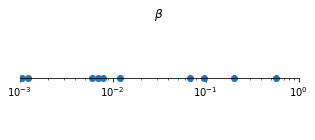

In [105]:
lims = [0.0001, 1]
x = (10**(-3*(np.random.randint(1, 100, size=10)/100)))
fig, ax = plt.subplots(figsize=(5, 2))
ax.plot(x, np.zeros_like(x), ls='none', marker='o')
ax.set_xscale('log')
ax.set_title('$\\beta$')
ax.set_yticks([])
ax.set_xlim([0.001, 1])
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')

<i id="fig:samplebeta">Hyperparameter sampling of $1-\beta$ (exponentially weighted average parameter)</i>